In [1]:
from PIL import Image
# Load image
image1 = Image.open(r"C:\Users\shubh\Documents\SOP\buoy2.jpg")

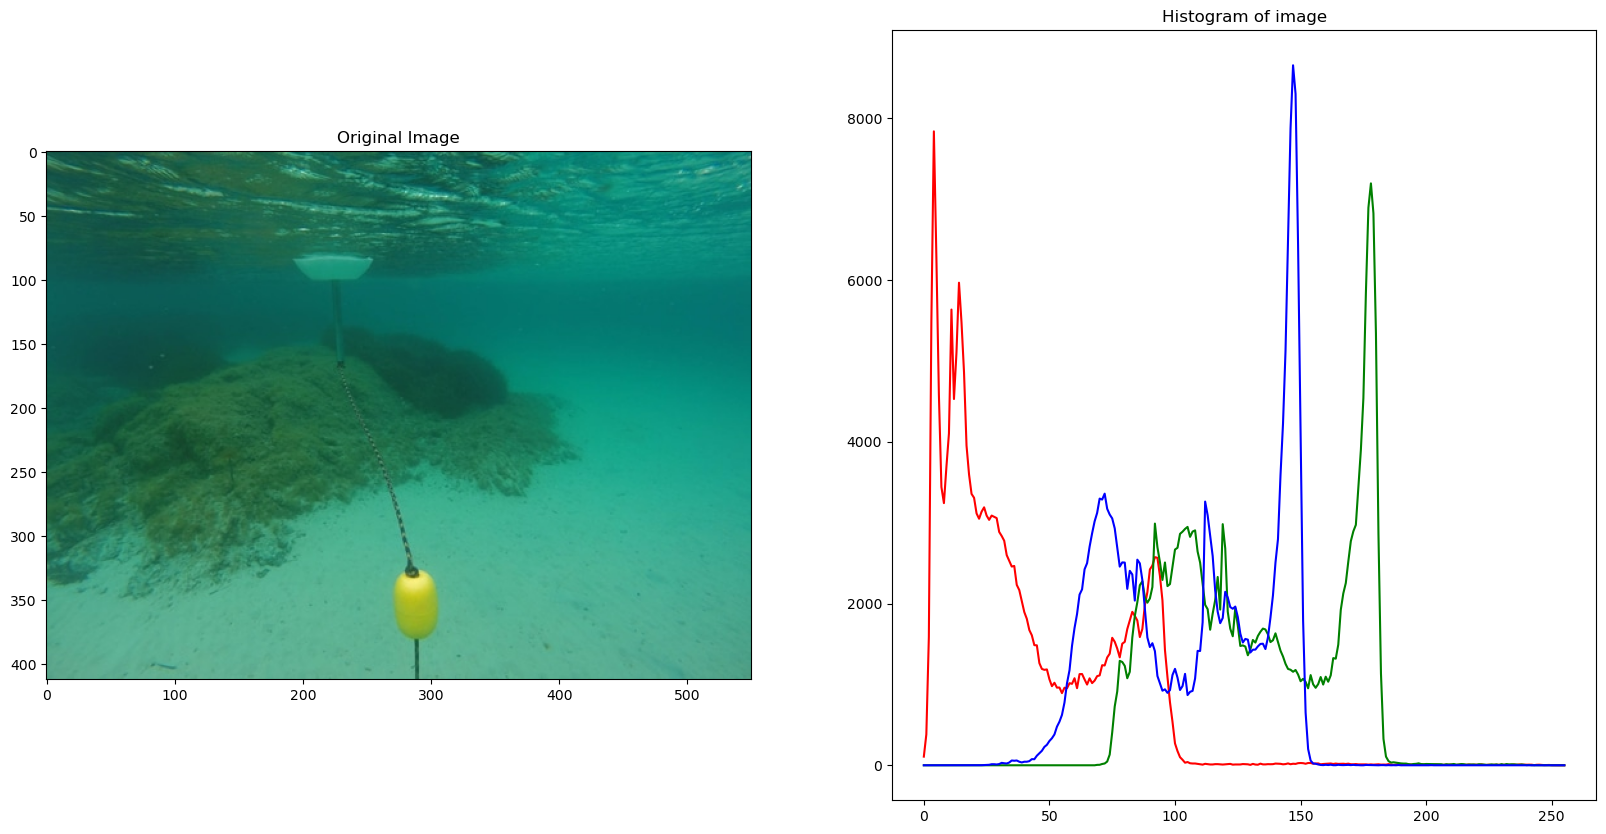

In [2]:
from matplotlib import pyplot as plt
def plot_histogram(image):
    # Split the R, G and B channels
    imageR, imageG, imageB = image.split()
    
    # Plot the histigrams
    plt.figure(figsize = (20, 10))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title("Histogram of image")
    plt.plot(imageR.histogram(), color='red') 
    plt.plot(imageG.histogram(), color='green')
    plt.plot(imageB.histogram(), color='blue')
    plt.show()

plot_histogram(image1)

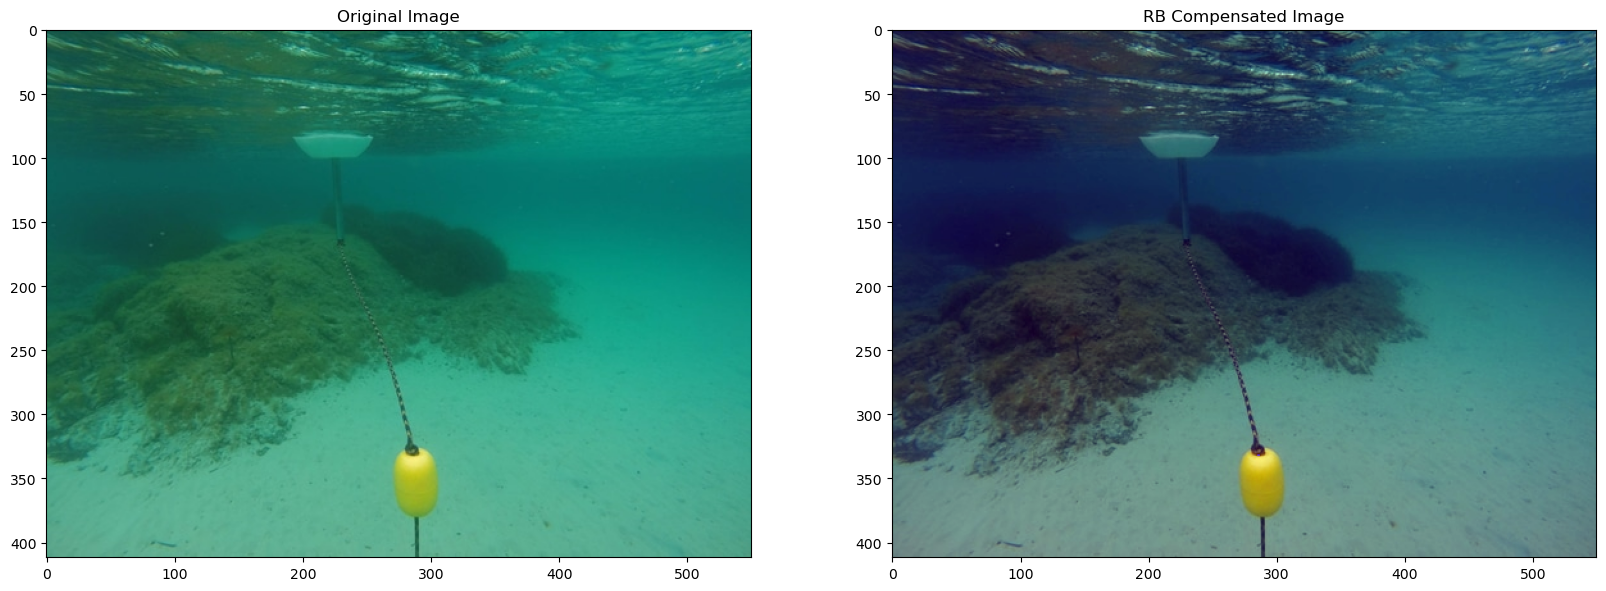

In [3]:
from PIL import Image, ImageStat
import numpy as np
# flag = 0 for Red, Blue Compensation via green channel
# flag = 1 for Red Compensation via green channel
def compensate_RB(image, flag):
    # Splitting the image into R, G and B components
    imager, imageg, imageb = image.split()
    
    minR, maxR = imager.getextrema()
    minG, maxG = imageg.getextrema()
    minB, maxB = imageb.getextrema()
    
    imageR = np.array(imager,np.float64)
    imageG = np.array(imageg,np.float64)
    imageB = np.array(imageb,np.float64)
    
    x,y = image.size
    
    for i in range(0, y):
        for j in range(0, x):
            imageR[i][j]=(imageR[i][j]-minR)/(maxR-minR)
            imageG[i][j]=(imageG[i][j]-minG)/(maxG-minG)
            imageB[i][j]=(imageB[i][j]-minB)/(maxB-minB)
    
    meanR=np.mean(imageR)
    meanG=np.mean(imageG)
    meanB=np.mean(imageB)
    

    if flag == 0:
        for i in range(y):
            for j in range(x):
                imageR[i][j]=int((imageR[i][j]+(meanG-meanR)*(1-imageR[i][j])*imageG[i][j])*maxR)
                imageB[i][j]=int((imageB[i][j]+(meanG-meanB)*(1-imageB[i][j])*imageG[i][j])*maxB)

        for i in range(0, y):
            for j in range(0, x):
                imageG[i][j]=int(imageG[i][j]*maxG)
   
    if flag == 1:
        for i in range(y):
            for j in range(x):
                imageR[i][j]=int((imageR[i][j]+(meanG-meanR)*(1-imageR[i][j])*imageG[i][j])*maxR)

        for i in range(0, y):
            for j in range(0, x):
                imageB[i][j]=int(imageB[i][j]*maxB)
                imageG[i][j]=int(imageG[i][j]*maxG)
            
    compensateIm = np.zeros((y, x, 3), dtype = "uint8")
    compensateIm[:, :, 0]= imageR;
    compensateIm[:, :, 1]= imageG;
    compensateIm[:, :, 2]= imageB;
    
    plt.figure(figsize = (20, 20))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title("RB Compensated Image")
    plt.imshow(compensateIm) 
    plt.show()
    compensateIm=Image.fromarray(compensateIm)
    
    return compensateIm

compensatedimage1=compensate_RB(image1, 0)

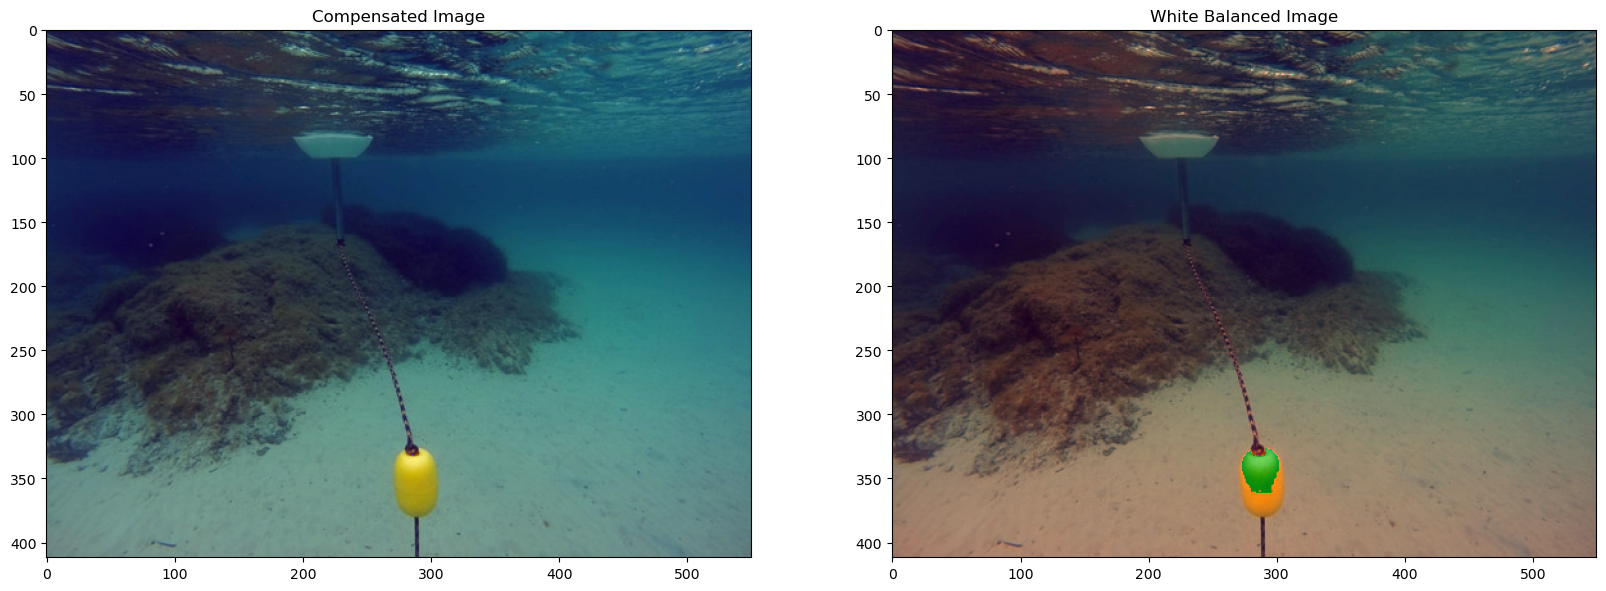

In [4]:
def gray_world(image):
    imager, imageg, imageb = image.split()
    
    imagegray=image.convert('L')
    
    imageR = np.array(imager,np.float64)
    imageG = np.array(imageg,np.float64)
    imageB = np.array(imageb,np.float64)
    imageGray=np.array(imagegray, np.float64)
    
    x,y = image.size
    
    meanR=np.mean(imageR)
    meanG=np.mean(imageG)
    meanB=np.mean(imageB)
    meanGray=np.mean(imageGray)
    
    for i in range(0, y):
        for j in range(0, x):
            imageR[i][j]=int(imageR[i][j]*meanGray/meanR)
            imageG[i][j]=int(imageG[i][j]*meanGray/meanG)
            imageB[i][j]=int(imageB[i][j]*meanGray/meanB)
    
    # Create the white balanced image
    whitebalancedIm = np.zeros((y, x, 3), dtype = "uint8")
    whitebalancedIm[:, :, 0]= imageR;
    whitebalancedIm[:, :, 1]= imageG;
    whitebalancedIm[:, :, 2]= imageB;
    
    # Plotting the compensated image
    plt.figure(figsize = (20, 20))
    plt.subplot(1, 2, 1)
    plt.title("Compensated Image")
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title("White Balanced Image")
    plt.imshow(whitebalancedIm) 
    plt.show()
    
    return Image.fromarray(whitebalancedIm)

whitebalanced1=gray_world(compensatedimage1)

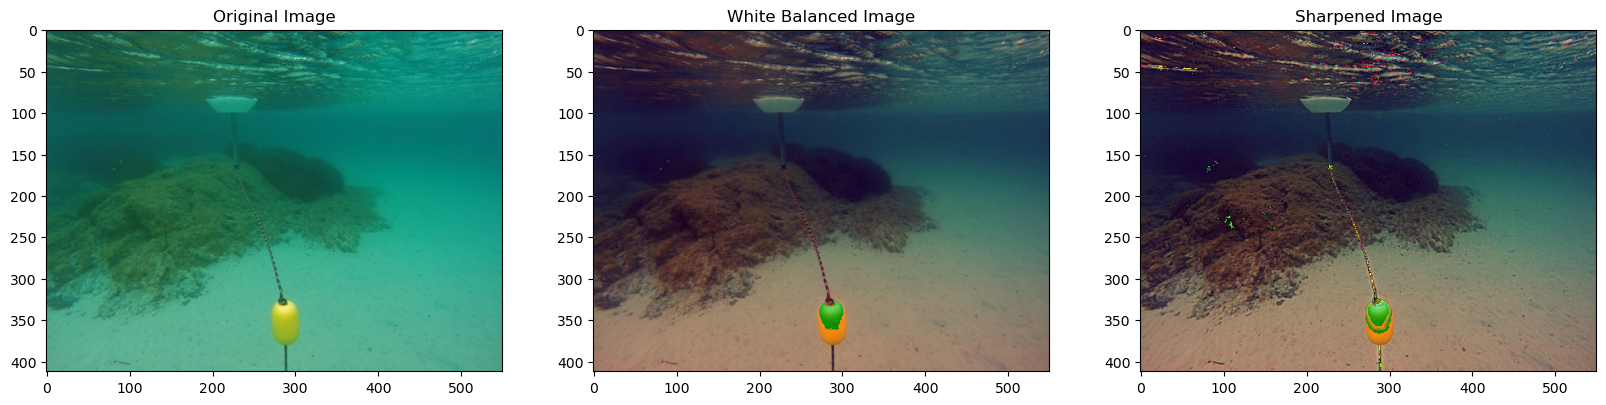

In [5]:
from PIL import ImageFilter

# Perform unsharp masking K=1
def sharpen(wbimage, original):
    # First find the smoothed image using Gaussian filter
    smoothed_image = wbimage.filter(ImageFilter.GaussianBlur)
    
    # Split the smoothed image into R, G and B channel
    smoothedr, smoothedg, smoothedb = smoothed_image.split()
    
    # Split the input image 
    imager, imageg, imageb = wbimage.split()
    
    # Convert image to array
    imageR = np.array(imager,np.float64)
    imageG = np.array(imageg,np.float64)
    imageB = np.array(imageb,np.float64)
    smoothedR = np.array(smoothedr,np.float64)
    smoothedG = np.array(smoothedg,np.float64)
    smoothedB = np.array(smoothedb,np.float64)
    
    x, y=wbimage.size
    
    # Perform unsharp masking 
    for i in range(y):
        for j in range(x):
            imageR[i][j]=2*imageR[i][j]-smoothedR[i][j]
            imageG[i][j]=2*imageG[i][j]-smoothedG[i][j]
            imageB[i][j]=2*imageB[i][j]-smoothedB[i][j]
    
    # Create sharpened image
    sharpenIm = np.zeros((y, x, 3), dtype = "uint8")         
    sharpenIm[:, :, 0]= imageR;
    sharpenIm[:, :, 1]= imageG;
    sharpenIm[:, :, 2]= imageB; 
    
    # Plotting the sharpened image
    plt.figure(figsize = (20, 20))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original)
    plt.subplot(1, 3, 2)
    plt.title("White Balanced Image")
    plt.imshow(wbimage)
    plt.subplot(1, 3, 3)
    plt.title("Sharpened Image")
    plt.imshow(sharpenIm) 
    plt.show()
    
    return Image.fromarray(sharpenIm)

sharpenedimage1=sharpen(whitebalanced1, image1)

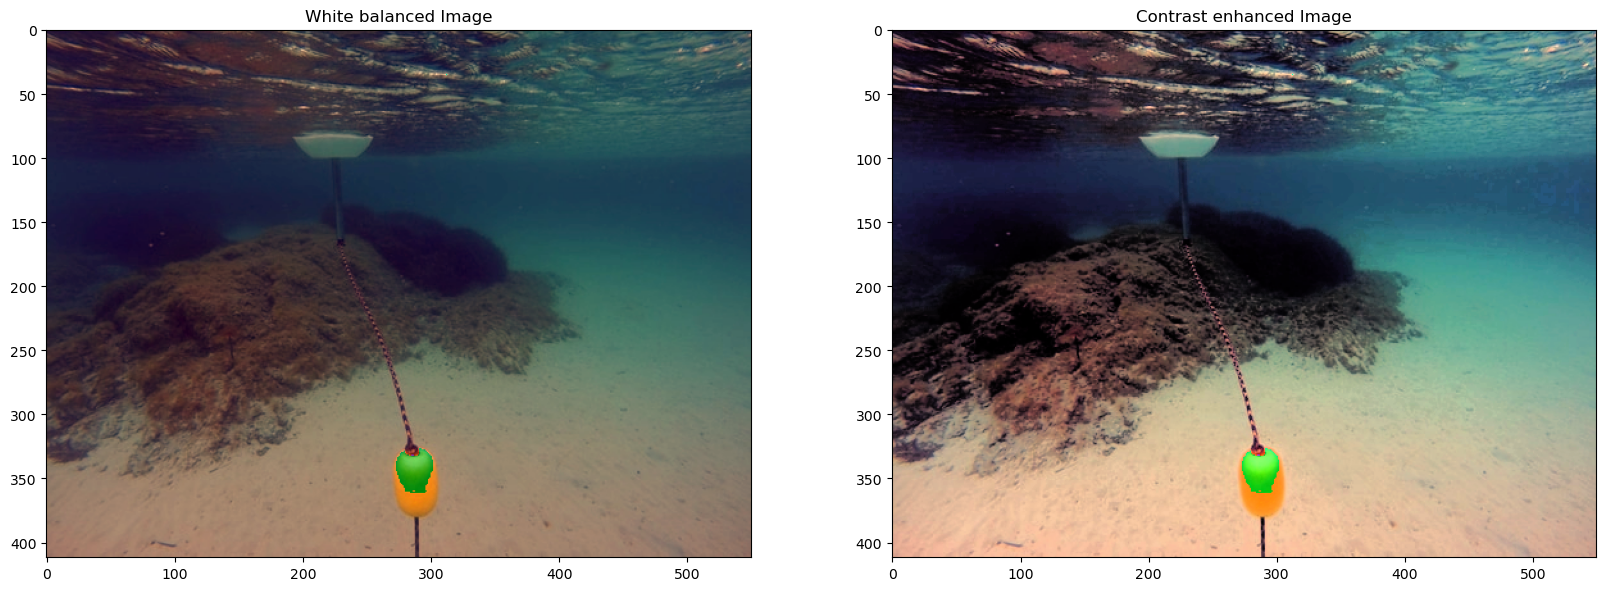

In [6]:
from PIL import Image, ImageOps

def hsv_global_equalization(image):
    # Convert to HSV
    hsvimage = image.convert('HSV')
   
    # Plot HSV Image
    plt.figure(figsize = (20, 20))
    plt.subplot(1, 2, 1)
    plt.title("White balanced Image")
    plt.imshow(hsvimage)
    
    # Splitting the Hue, Saturation and Value Component 
    Hue, Saturation, Value = hsvimage.split()
    # Perform Equalization on Value Component
    equalizedValue = ImageOps.equalize(Value, mask = None)

    x, y = image.size
    # Create the equalized Image
    equalizedIm = np.zeros((y, x, 3), dtype = "uint8")
    equalizedIm[:, :, 0]= Hue;
    equalizedIm[:, :, 1]= Saturation;
    equalizedIm[:, :, 2]= equalizedValue;
    
    # Convert the array to image
    hsvimage = Image.fromarray(equalizedIm, 'HSV') 
    # Convert to RGB
    rgbimage = hsvimage.convert('RGB')
    
    # Plot equalized image
    plt.subplot(1, 2, 2)
    plt.title("Contrast enhanced Image")
    plt.imshow(rgbimage)
    
    return rgbimage

contrastenhanced1 = hsv_global_equalization(whitebalanced1)

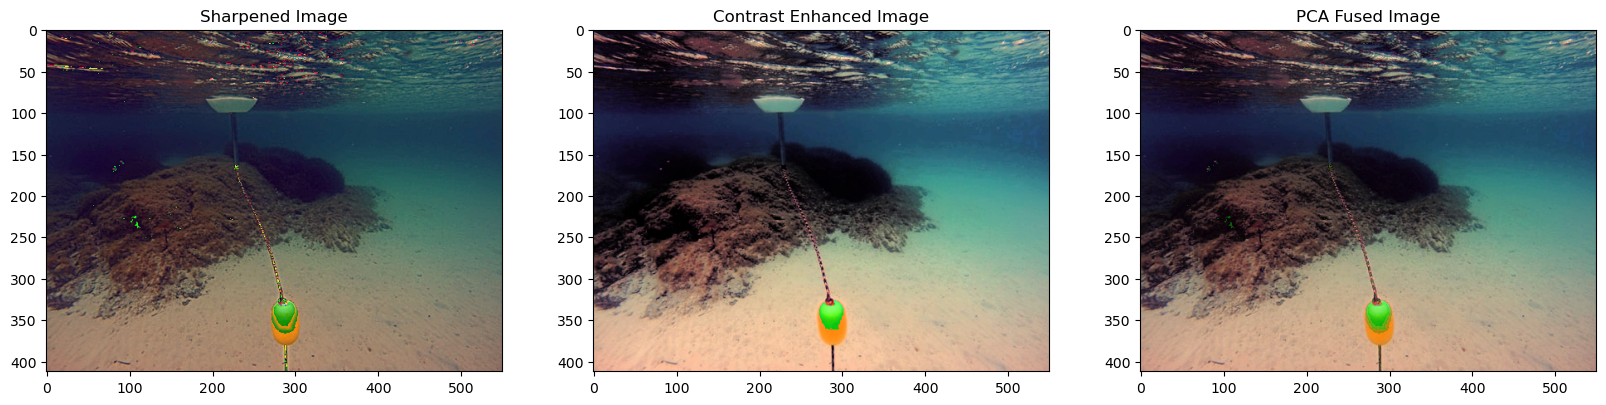

In [8]:
def pca_fusion(image1, image2):
    # Split the images in R, G, B components
    image1r, image1g, image1b = image1.split()
    image2r, image2g, image2b = image2.split()
    
    # Convert to column vector
    image1R = np.array(image1r, np.float64).flatten()
    image1G = np.array(image1g, np.float64).flatten()
    image1B = np.array(image1b, np.float64).flatten()
    image2R = np.array(image2r, np.float64).flatten()
    image2G = np.array(image2g, np.float64).flatten()
    image2B = np.array(image2b, np.float64).flatten()
    
    # Get mean of each channel
    mean1R=np.mean(image1R)
    mean1G=np.mean(image1G)
    mean1B=np.mean(image1B)
    mean2R=np.mean(image2R)
    mean2G=np.mean(image2G)
    mean2B=np.mean(image2B)
    
    # Create a 2*N array where each column represents each image channel 
    imageR=np.array((image1R, image2R))
    imageG=np.array((image1G, image2G))
    imageB=np.array((image1B, image2B))
    
    x, y = imageR.shape
    
    # Subtract the respective mean from each column
    for i in range(y):
        imageR[0][i]-=mean1R
        imageR[1][i]-=mean2R
        imageG[0][i]-=mean1G
        imageG[1][i]-=mean2G
        imageB[0][i]-=mean1B
        imageB[1][i]-=mean2B
    
    # Find the covariance matrix
    covR=np.cov(imageR)
    covG=np.cov(imageG)
    covB=np.cov(imageB)
        
    # Find eigen value and eigen vector
    valueR, vectorR = np.linalg.eig(covR)
    valueG, vectorG = np.linalg.eig(covG)
    valueB, vectorB = np.linalg.eig(covB)
    
    # Find the coefficients for each channel which will act as weight for images
    if(valueR[0] >= valueR[1]):
        coefR=vectorR[:, 0]/sum(vectorR[:, 0])
    else:
        coefR=vectorR[:, 1]/sum(vectorR[:, 1])
    
    if(valueG[0] >= valueG[1]):
        coefG=vectorG[:, 0]/sum(vectorG[:, 0])
    else:
        coefG=vectorG[:, 1]/sum(vectorG[:, 1])
    
    if(valueB[0] >= valueB[1]):
        coefB=vectorB[:, 0]/sum(vectorB[:, 0])
    else:
        coefB=vectorB[:, 1]/sum(vectorB[:, 1])
   
    # Convert to array
    image1R = np.array(image1r, np.float64)
    image1G = np.array(image1g, np.float64)
    image1B = np.array(image1b, np.float64)
    image2R = np.array(image2r, np.float64)
    image2G = np.array(image2g, np.float64)
    image2B = np.array(image2b, np.float64) 
    
    x, y = image1R.shape
    
    # Calculate the pixel value for the fused image from the coefficients obtained above
    for i in range(x):
        for j in range(y):
            image1R[i][j]=int(coefR[0]*image1R[i][j]+coefR[1]*image2R[i][j])
            image1G[i][j]=int(coefG[0]*image1G[i][j]+coefG[1]*image2G[i][j])
            image1B[i][j]=int(coefB[0]*image1B[i][j]+coefB[1]*image2B[i][j])
  
    # Create the fused image
    fusedIm = np.zeros((x, y, 3), dtype = "uint8")
    fusedIm[:, :, 0]= image1R;
    fusedIm[:, :, 1]= image1G;
    fusedIm[:, :, 2]= image1B;
    
    # Plot the fused image
    plt.figure(figsize = (20, 20))
    plt.subplot(1, 3, 1)
    plt.title("Sharpened Image")
    plt.imshow(image1)
    plt.subplot(1, 3, 2)
    plt.title("Contrast Enhanced Image")
    plt.imshow(image2)
    plt.subplot(1, 3, 3)
    plt.title("PCA Fused Image")
    plt.imshow(fusedIm) 
    plt.show()
    
    return Image.fromarray(fusedIm)
 
pcafused1 = pca_fusion(sharpenedimage1, contrastenhanced1)